## Baseline Scenario

Proportional fair split (dynamic) given an oracle that know the exact current number of associated users and sensors. Use estimated average traffic request per UE and per sensor.


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


KeyboardInterrupt: 

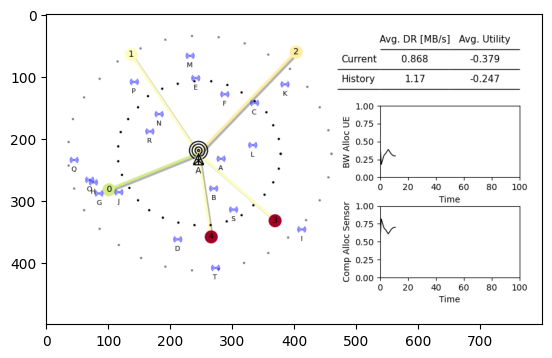

In [3]:
from IPython import display

done = False
obs, info = env.reset()

dummy_action = [0.50, 0.50]

for _ in range(100):
    obs, reward, terminated, truncated, info = env.step(tuple(dummy_action))

    # Get the latest metrics from the environment
    scalar_results, _, _, _, _ = env.monitor.load_results()

    # Retrieve the last traffic requests for users (UEs) and sensors
    ue_traffic_requests = scalar_results["total traffic request ue"].iloc[-1]
    sensor_traffic_requests = scalar_results["total traffic request sensor"].iloc[-1]

    # Calculate the total traffic requests
    total_traffic_requests = ue_traffic_requests + sensor_traffic_requests

    # Avoid division by zero
    if total_traffic_requests == 0:
        dummy_action[0] = 0.5  # Default split in case no traffic
        dummy_action[1] = 0.5
    else:
        # Proportional allocation based on traffic requests
        dummy_action[0] = ue_traffic_requests / total_traffic_requests
        dummy_action[1] = sensor_traffic_requests / total_traffic_requests

    if terminated or truncated:
        break

    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [4]:
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

scalar_results

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,reward,cumulative reward,mean utility,mean utility sensor,mean datarate,mean datarate sensor
Time Step,,,,,,,,,,,,
0,5,20,47.0,82.0,0,0,0.00,0.00,0.039419,0.042077,1.765301,6.335192
1,5,20,44.0,124.0,0,0,9.50,9.50,-0.022697,0.092706,1.305901,8.054043
2,5,20,48.0,94.0,0,0,9.02,18.52,-0.089876,0.123528,0.922000,9.351950
3,5,20,55.0,93.0,0,0,0.00,18.52,-0.029968,0.101073,1.195294,8.387437
4,5,20,48.0,95.0,0,1,0.00,18.52,-0.003763,0.090330,1.307428,7.961795
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,20,64.0,114.0,0,5,4.40,-190.78,0.197465,0.113745,5.710719,8.918818
96,5,20,49.0,112.0,1,5,-0.82,-191.60,0.231268,0.094255,5.939468,8.114740
97,5,20,46.0,97.0,0,5,0.54,-191.06,0.189127,0.111311,4.575894,8.814180


In [5]:
kpi_results

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,reward,reward cumulative,total aori,total aosi,total delayed packets,total throughput ue,total throughput sensor
Time Step,,,,,,,,,,,
0,0.50,0.50,0.50,0.50,0.00,0.00,0.0,0.0,0,8.826507,28.734039
1,0.36,0.64,0.64,0.36,9.50,9.50,1.0,1.0,0,5.349728,37.173623
2,0.26,0.74,0.74,0.26,9.02,18.52,2.0,2.0,0,3.812972,39.448798
3,0.34,0.66,0.66,0.34,0.00,18.52,0.0,0.0,0,5.976469,34.086781
4,0.37,0.63,0.63,0.37,0.00,18.52,0.0,0.0,0,6.537141,33.954017
...,...,...,...,...,...,...,...,...,...,...,...
95,0.30,0.70,0.70,0.30,4.40,-190.78,0.0,16.0,0,18.041601,34.232325
96,0.36,0.64,0.64,0.36,-0.82,-191.60,70.0,70.0,1,18.541331,39.448618
97,0.30,0.70,0.70,0.30,0.54,-191.06,0.0,57.0,0,19.233875,38.642130


In [6]:
ue_results

Metric           AoRI  AoSI  distance UE-station  traffic request  \
Time Step UE ID                                                     
0         0       NaN   NaN            58.457556              7.0   
          1       NaN   NaN           110.874807              9.0   
          2       NaN   NaN           122.207981             17.0   
          3       NaN   NaN            94.300447             10.0   
          4       NaN   NaN            75.313075              4.0   
...               ...   ...                  ...              ...   
99        0       NaN   NaN            79.815138             12.0   
          1       0.0  18.0            38.566752              9.0   
          2       NaN   NaN            94.049429              7.0   
          3       NaN   NaN            63.562995             11.0   
          4      72.0  54.0            58.535843             10.0   

Metric           user datarate  user queue size  user throughput  user utility  
Time Step UE ID                                                                 
0         0           4.757415              1.0         4.757415      0.338686  
          1           0.586876              1.0         0.586876     -0.115727  
          2           0.431710              1.0         0.431710     -0.182404  
          3           1.005519              1.0         1.005519      0.001195  
          4           2.044987              1.0         2.044987      0.155345  
...                        ...              ...              ...           ...  
99        0           1.256564             63.0         1.256564      0.049592  
          1          15.290752              0.0         9.000000      0.592214  
          2           0.716860             58.0         0.716860     -0.072283  
          3           2.807771              7.0         2.807771      0.224181  
          4           3.719068             50.0         3.719068      0.285217  

[500 rows x 8 columns]

In [7]:
ss_results

Metric               distance sensor-station  sensor datarate  \
Time Step Sensor ID                                             
0         0                        16.492423        90.297113   
          1                        30.083218        11.860458   
          2                        57.280014         1.347652   
          3                        70.611614         0.664789   
          4                        61.032778         1.087684   
...                                      ...              ...   
99        15                       74.027022         0.724844   
          16                       89.140339         0.387044   
          17                       39.357337         6.120985   
          18                       51.478151         2.472022   
          19                       92.779308         0.338124   

Metric               sensor queue size  sensor throughput  sensor utility  \
Time Step Sensor ID                                                         
0         0                        0.0           7.000000        0.977837   
          1                        0.0           2.000000        0.537051   
          2                        0.0           1.000000        0.064789   
          3                        1.0           0.664789       -0.088658   
          4                        1.0           1.087684        0.018251   
...                                ...                ...             ...   
99        15                      85.0           0.724844       -0.069878   
          16                      92.0           0.387044       -0.206120   
          17                       0.0           4.000000        0.393411   
          18                      54.0           2.472022        0.196526   
          19                      91.0           0.338124       -0.235462   

Metric               traffic request  
Time Step Sensor ID                   
0         0                      7.0  
          1                      2.0  
          2                      1.0  
          3                      7.0  
          4                      5.0  
...                              ...  
99        15                     5.0  
          16                     3.0  
          17                     4.0  
          18                     5.0  
          19                     4.0  

[2000 rows x 6 columns]

In [8]:
bs_results

,Metric,queue size accomplished UE jobs,queue size accomplished sensor jobs,queue size transferred UE jobs,queue size transferred sensor jobs
Time Step,BS ID,,,,
0,0,0,5,0,0
1,0,1,11,0,0
2,0,2,17,0,2
3,0,2,24,0,4
4,0,2,31,0,2
...,...,...,...,...,...
95,0,164,620,0,137
96,0,166,625,0,138
97,0,167,630,0,141


In [9]:
data = kpi_results.agg(['min', 'max', 'mean'])
data

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,reward,reward cumulative,total aori,total aosi,total delayed packets,total throughput ue,total throughput sensor
min,0.2400,0.5000,0.5000,0.2400,-35.0000,-419.1700,0.00,0.0,0.00,2.775632,28.734039
max,0.5000,0.7600,0.7600,0.5000,23.5700,18.5200,130.00,113.0,7.00,66.306312,49.640269
mean,0.3342,0.6658,0.6658,0.3342,-1.9318,-180.2553,26.17,27.2,1.08,17.105524,39.569350


In [10]:
data = scalar_results.agg(['min', 'max', 'mean'])
data

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,reward,cumulative reward,mean utility,mean utility sensor,mean datarate,mean datarate sensor
min,5.0,20.0,34.00,73.00,0.00,0.00,-35.0000,-419.1700,-0.089876,0.042077,0.905732,6.335192
max,5.0,20.0,70.00,126.00,7.00,9.00,23.5700,18.5200,0.394882,0.130512,982.239648,9.674009
mean,5.0,20.0,50.32,101.09,1.08,5.21,-1.9318,-180.2553,0.198471,0.101731,84.192469,8.434553


In [11]:
data = ue_results.reset_index()
data = data.groupby('UE ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric       AoRI                   AoSI             distance UE-station  \
             mean   min   max       mean   min   max                mean   
UE ID                                                                      
0       24.875000   1.0  65.0  20.250000   1.0  52.0           86.195208   
1       13.153846   0.0  57.0  17.903846   3.0  57.0           47.532582   
2       52.857143  32.0  76.0  43.857143  28.0  62.0           89.953579   
3       14.903846   0.0  55.0  16.596154   6.0  45.0           49.517584   
4       32.722222   2.0  72.0  25.388889   2.0  54.0           72.798475   

Metric                        traffic request  ... user datarate  \
              min         max            mean  ...           max   
UE ID                                          ...                 
0       58.457556   99.946785           10.72  ...      4.757415   
1        7.323860  110.874807            9.35  ...   4883.984081   
2       77.179383  122.207981            9.79  ...      1.607580   
3       26.206380   94.300447           10.15  ...     63.365546   
4       58.535843   92.039596           10.31  ...      3.719068   

Metric user queue size            user throughput                       \
                  mean  min   max            mean       min        max   
UE ID                                                                    
0                27.92  0.0  63.0        1.025691  0.386703   4.757415   
1                 6.84  0.0  19.0        6.680000  0.000000  45.382616   
2                29.34  1.0  58.0        0.894012  0.240352   1.607580   
3                 8.08  0.0  23.0        6.746393  0.000000  40.585251   
4                23.09  0.0  50.0        1.759428  0.386103   3.719068   

Metric user utility                      
               mean       min       max  
UE ID                                    
0         -0.022724 -0.206311  0.338686  
1          0.508251 -0.237649  1.000000  
2         -0.043533 -0.309576  0.103086  
3          0.444448 -0.116360  0.900927  
4          0.105912 -0.105935  0.285217  

[5 rows x 24 columns]

In [12]:
data = ss_results.reset_index()
data = data.groupby('Sensor ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric    distance sensor-station                       sensor datarate  \
                             mean        min        max            mean   
Sensor ID                                                                 
0                       16.492423  16.492423  16.492423      120.219836   
1                       30.083218  30.083218  30.083218       15.790785   
2                       57.280014  57.280014  57.280014        1.794238   
3                       70.611614  70.611614  70.611614        0.885087   
4                       61.032778  61.032778  61.032778        1.448122   
5                       51.623638  51.623638  51.623638        2.549029   
6                       77.878110  77.878110  77.878110        0.635804   
7                       78.447435  78.447435  78.447435        0.620355   
8                       95.900991  95.900991  95.900991        0.314776   
9                       64.884513  64.884513  64.884513        1.177733   
10                      83.546394  83.546394  83.546394        0.501508   
11                      39.623226  39.623226  39.623226        6.228849   
12                      79.227520  79.227520  79.227520        0.599967   
13                      42.520583  42.520583  42.520583        4.907944   
14                      80.777472  80.777472  80.777472        0.561968   
15                      74.027022  74.027022  74.027022        0.754582   
16                      89.140339  89.140339  89.140339        0.402923   
17                      39.357337  39.357337  39.357337        6.372107   
18                      51.478151  51.478151  51.478151        2.573440   
19                      92.779308  92.779308  92.779308        0.351996   

Metric                           sensor queue size             \
                 min         max              mean  min   max   
Sensor ID                                                       
0          90.297113  137.886132              0.00  0.0   0.0   
1          11.860458   18.111240              0.00  0.0   0.0   
2           1.347652    2.057901             31.06  0.0  63.0   
3           0.664789    1.015151             42.32  1.0  82.0   
4           1.087684    1.660923             35.59  1.0  70.0   
5           1.914575    2.923608             25.25  1.0  49.0   
6           0.477553    0.729236             45.31  1.0  89.0   
7           0.465949    0.711516             44.49  1.0  88.0   
8           0.236428    0.361032             47.53  1.0  95.0   
9           0.884595    1.350801             38.94  1.0  77.0   
10          0.376683    0.575205             46.13  1.0  91.0   
11          4.678489    7.144178              0.26  0.0   1.0   
12          0.450635    0.688133             46.94  1.0  91.0   
13          3.686356    5.629166              4.14  0.0   8.0   
14          0.422094    0.644549             44.65  1.0  87.0   
15          0.566766    0.865467             43.79  1.0  85.0   
16          0.302636    0.462133             46.52  1.0  92.0   
17          4.786090    7.308488              0.45  0.0   2.0   
18          1.932911    2.951607             28.50  1.0  54.0   
19          0.264384    0.403722             45.92  1.0  91.0   

Metric    sensor throughput                      sensor utility            \
                       mean       min        max           mean       min   
Sensor ID                                                                   
0                  5.040000  1.000000  12.000000       0.999778  0.977837   
1                  4.960000  1.000000  12.000000       0.598689  0.537051   
2                  1.790762  1.000000   2.057901       0.126427  0.064789   
3                  0.885087  0.664789   1.015151      -0.027020 -0.088658   
4                  1.448122  1.087684   1.660923       0.079890  0.018251   
5                  2.549029  1.914575   2.923608       0.202675  0.141036   
6                  0.635804  0.477553   0.729236      -0.098851 -0.160489   
7       

In [13]:
data = bs_results.reset_index()
data = data.groupby('BS ID').agg(['mean', 'min', 'max'])
data = data.drop('Time Step', axis='columns')
data

Metric queue size accomplished UE jobs           \
                                  mean min  max   
BS ID                                             
0                                74.71   0  171   

Metric queue size accomplished sensor jobs           \
                                      mean min  max   
BS ID                                                 
0                                   328.96   5  642   

Metric queue size transferred UE jobs          \
                                 mean min max   
BS ID                                           
0                                0.05   0   2   

Metric queue size transferred sensor jobs           
                                     mean min  max  
BS ID                                               
0                                   63.25   0  147

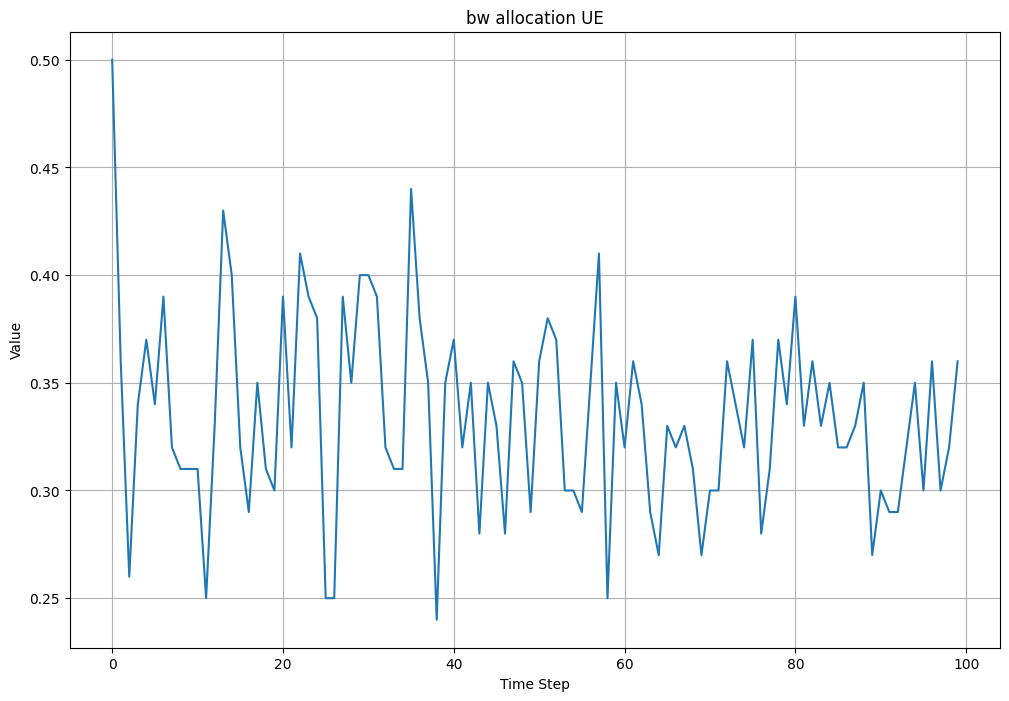

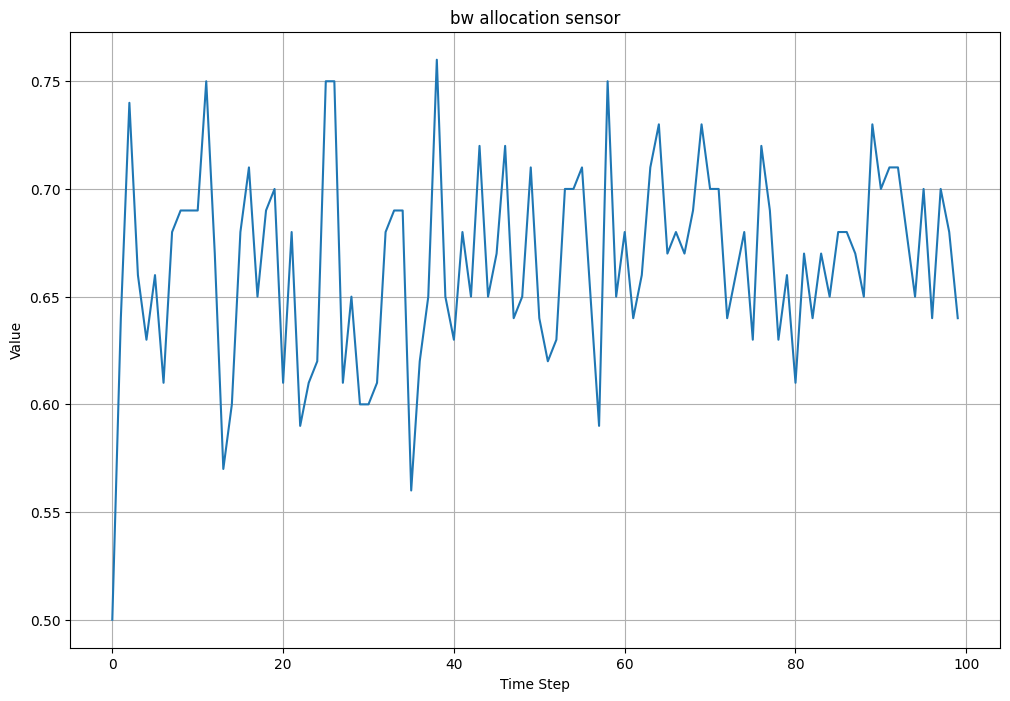

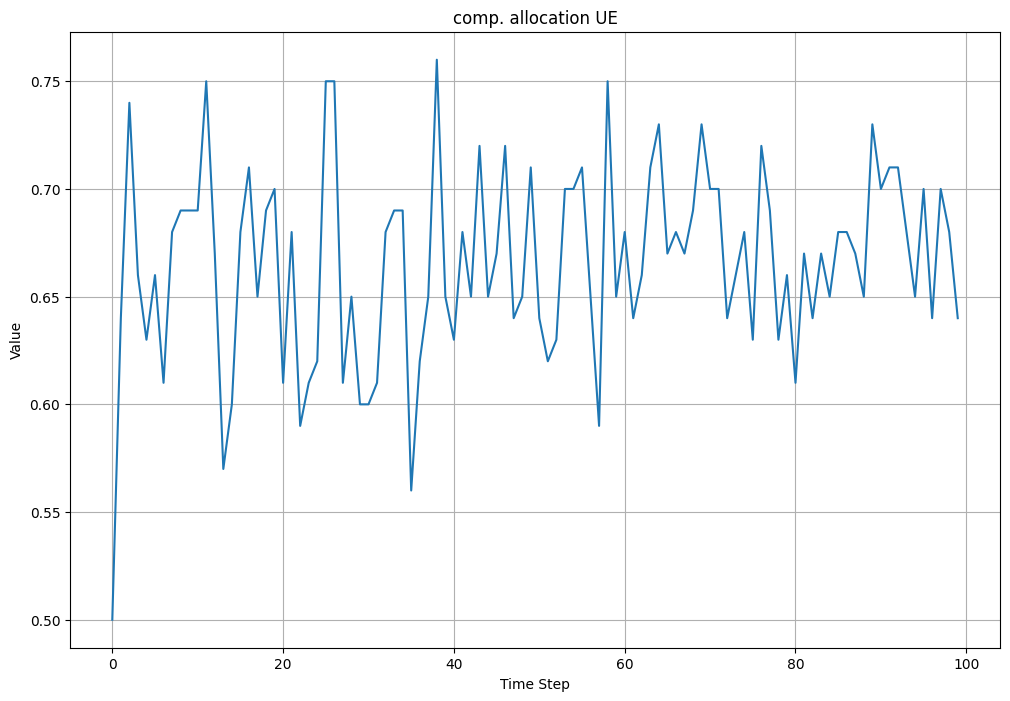

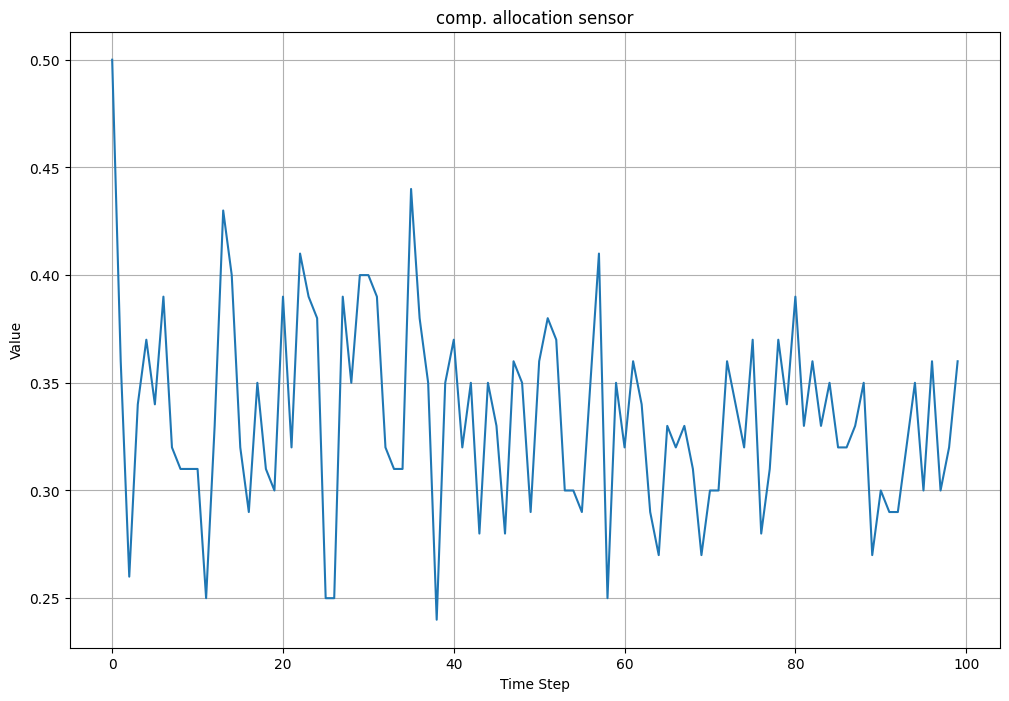

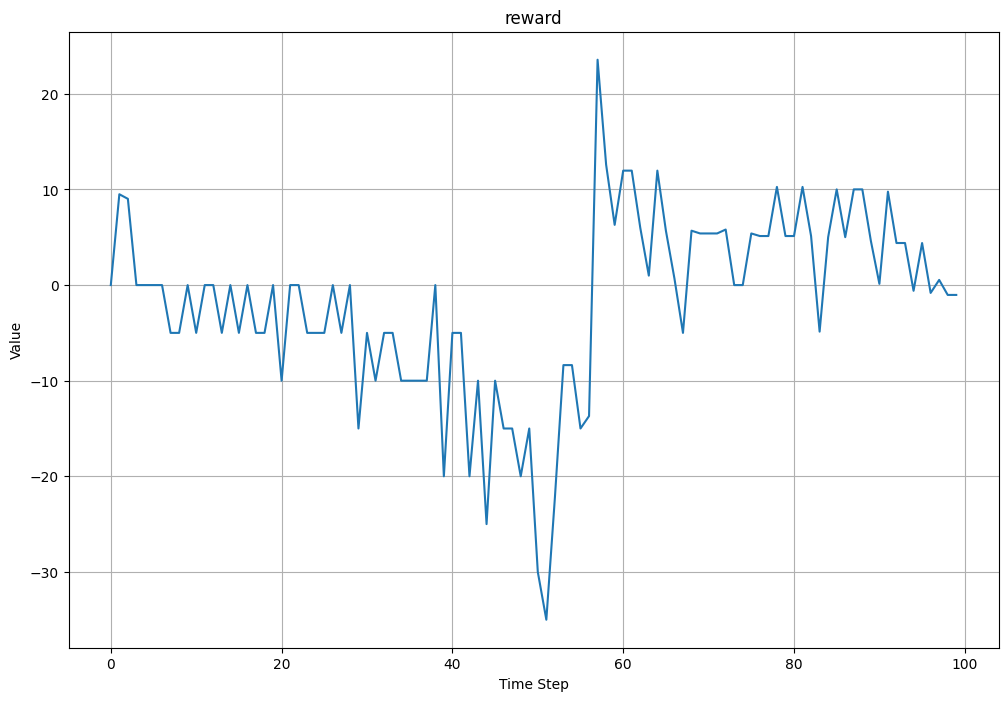

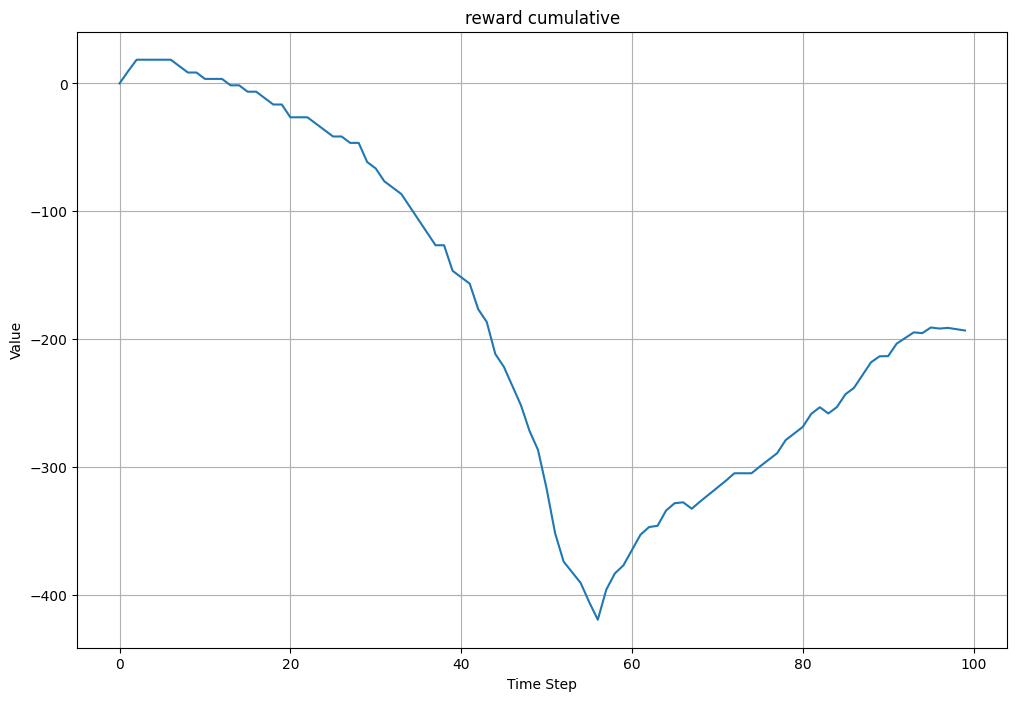

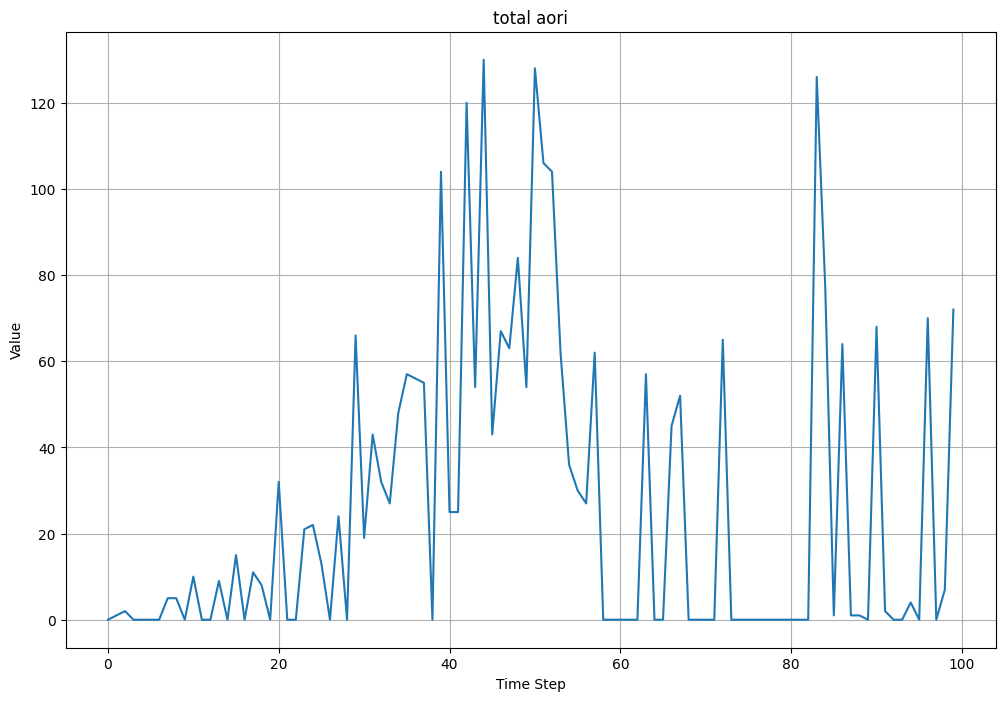

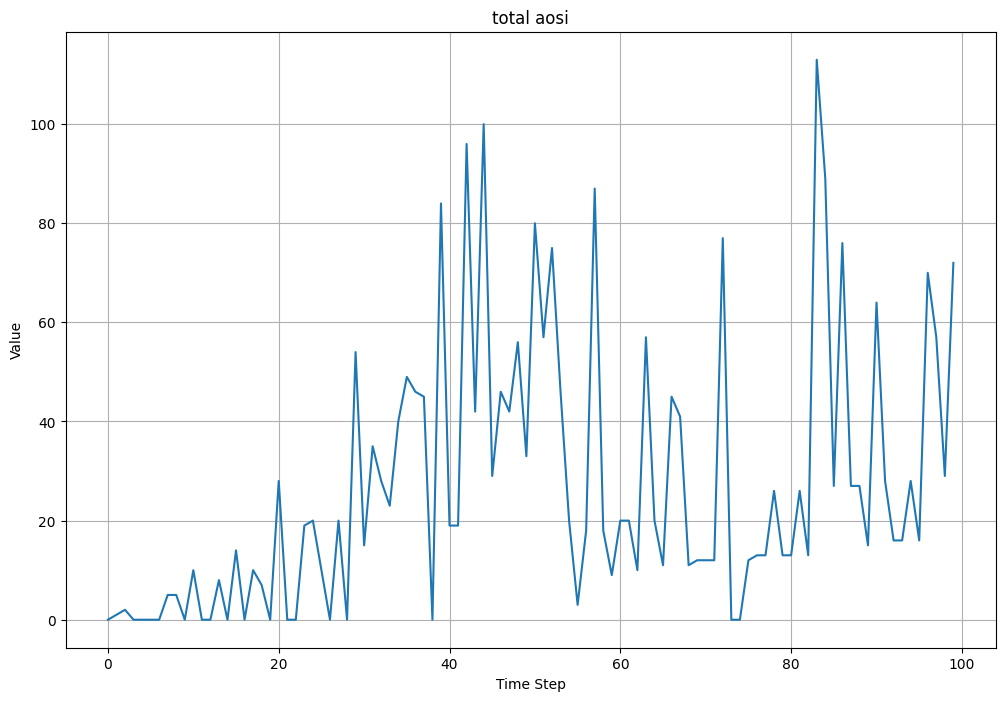

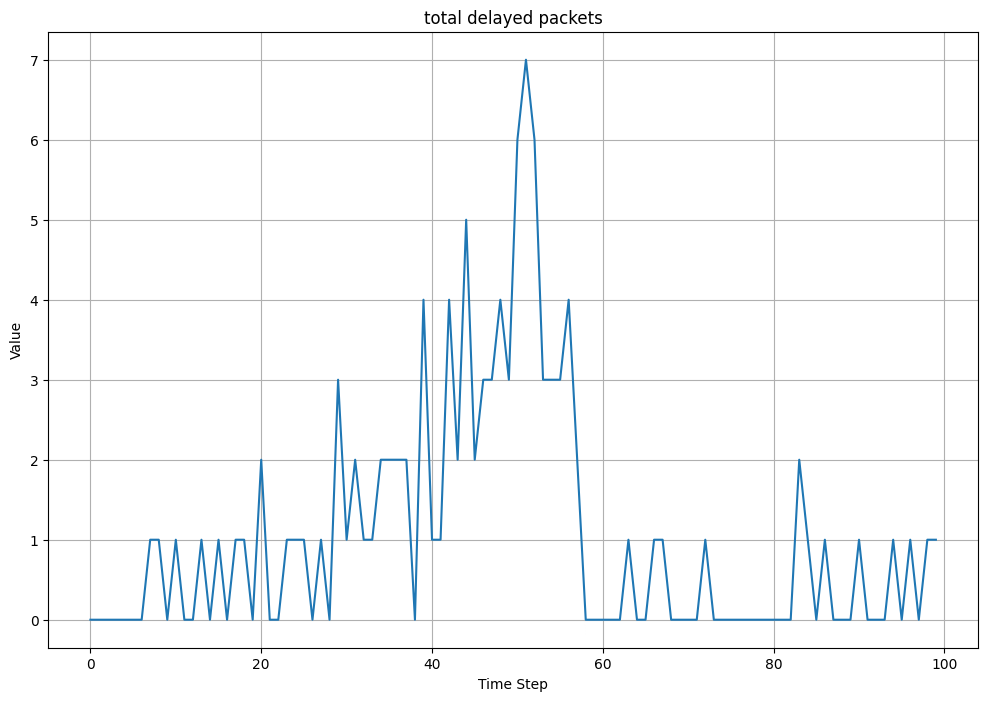

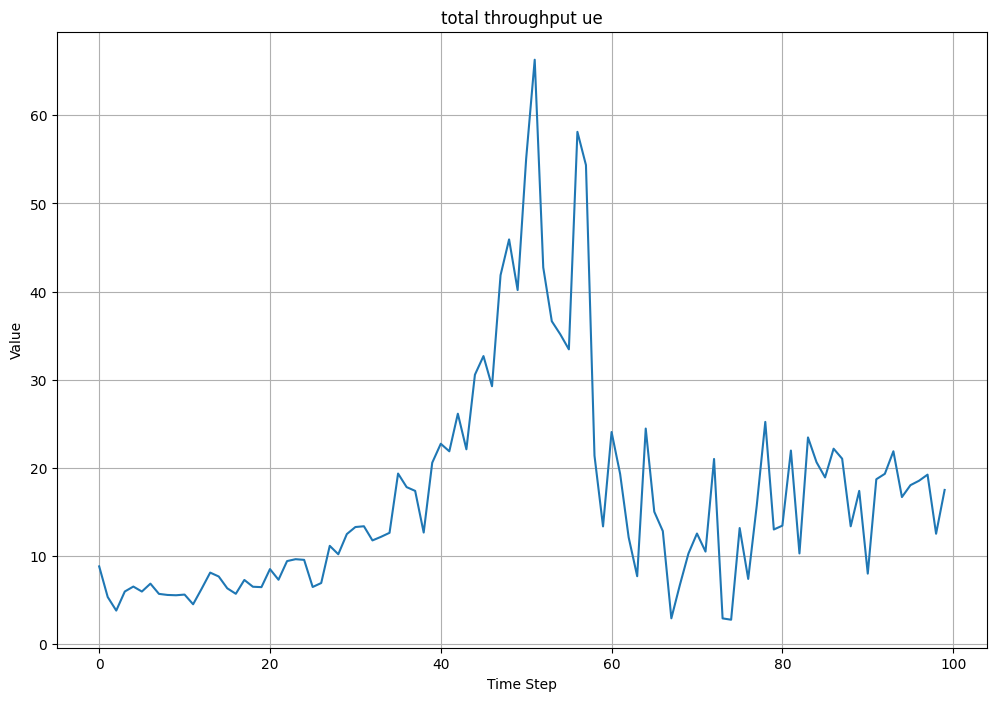

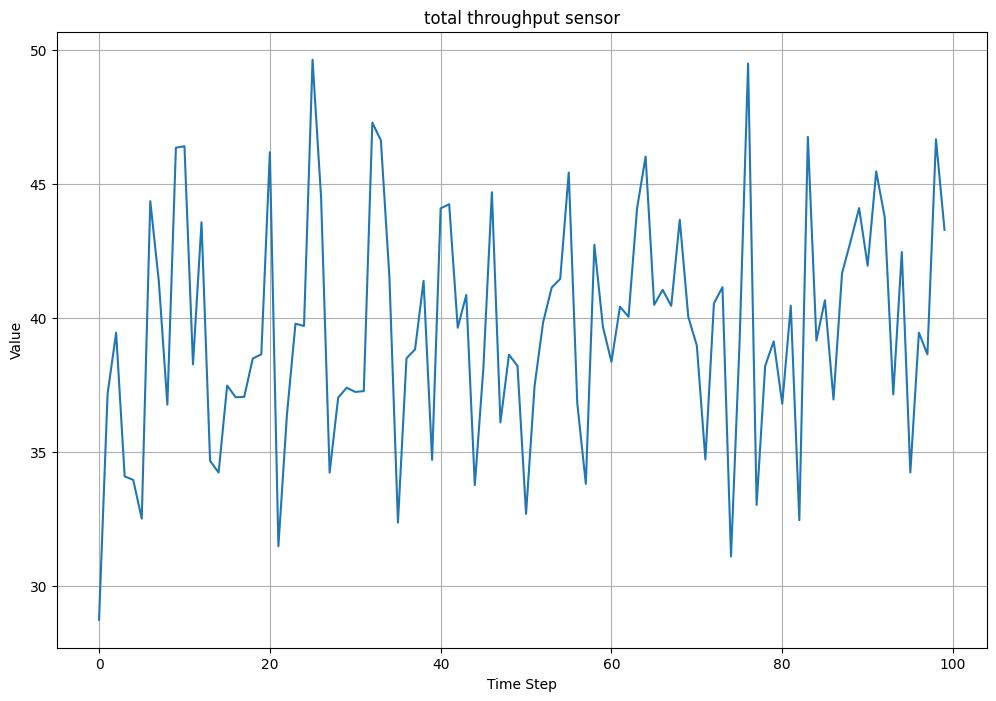

In [14]:
import matplotlib.pyplot as plt

def plot_kpi_metrics():
    # Plot kpi metrics
    for metric in kpi_results.columns:
        plt.figure(figsize=(12, 8))
        kpi_results[metric].plot()
        plt.title(f"{metric}")
        plt.xlabel("Time Step")
        plt.ylabel("Value")
        plt.grid(True)
        plt.show()

plot_kpi_metrics()